##**Caso Estudio N°8**

Se entrega el siguiente set de datos ContactoCobranza.csv, de una empresa
que ofrece servicios de CallCenter respecto a la gestión de ventas, crosssell, comunicaciones generales, gestión de retención, cobranzas y demás.
La siguiente empresa al dedicarse al rubro de Telemarketing y gestión
telefónica tiene como principal KPI de su negocio la contactabilidad de los
leads, es decir de todos los leads quegestiona, con cuántos de éstos puede
hablar con el titular de la línea (Contactabilidad = CE / CE+CNE) y así poder
realizar la acción establecida. La información que manejamos es del área
específica de gestión de cobranzas, dónde necesitamos recuperar el mayor
monto adeudado posible. La empresa tiene presencia en todo Lima y
provincias y en los últimos meses su ratio de contactabilidad ha
decrementado en 4pp, pasando de 34% enCE a 30% en CE en promedio. Para
recuperar elmáximo de dinero de la compañía contratante y reducir los
costos de las llamadas outbound necesitamos aumentar el ratio de
contactabilidad.
En resumen, ¿Cómo puede la empresa tener una mayor contactabilidadpara
la gestión de cobranzas de distintas campañas? Para responder aesto,
tenemos que analizar las últimas campañas de la gestión del Callcenter e
identificar los patrones que nos ayudarán a encontrar conclusiones para
desarrollar estrategias futuras y mejorar el KPI de contactabilidad.

In [395]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

In [396]:
from google.colab import files

In [397]:
#uploaded = files.upload()

In [398]:
df = pd.read_csv("ContactoCobranza.csv",sep=";")

In [399]:
df.head()

,MES,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ESTATUS,ACTIVACION,MORA,TIPOCONTACTO
0,201402,C00001,NaN,0,0,"<24, 48]",244.86,0.00,245.26,03/02/2014,15.0,3816.34,BT,2012.0,1.0,COEF
1,201402,C00002,<=10,0,0,>48,610.58,612.69,611.54,18/02/2014,9.0,13620.50,BT,2012.0,1.0,COEF
2,201402,C00003,<=10,>0,0,"<24, 48]",2138.73,0.00,NaN,05/02/2014,16.0,18968.50,BT,2013.0,0.0,CNE
3,201402,C00004,>10,0,0,"<24, 48]",323.07,46.85,74.26,24/02/2014,19.0,2459.84,BT,2012.0,0.0,CNE
4,201402,C00005,<=10,0,0,"<24, 48]",920.54,0.00,0.00,12/02/2014,14.0,6591.76,BT,2013.0,0.0,CNE


In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MES           8458 non-null   int64  
 1   CLIENTE       8458 non-null   object 
 2   NRO_VEC_COB   6376 non-null   object 
 3   PDPs_ROTAS    8458 non-null   object 
 4   ESTADO_PDP    8458 non-null   int64  
 5   NRO_CUOTAS    7779 non-null   object 
 6   MES_0         8458 non-null   float64
 7   MES_1         8458 non-null   float64
 8   MES_2         7557 non-null   float64
 9   FECHALLAMADA  8458 non-null   object 
 10  HORA          8458 non-null   float64
 11  DEUDA_TOTAL   8458 non-null   float64
 12  ESTATUS       8458 non-null   object 
 13  ACTIVACION    8458 non-null   float64
 14  MORA          8458 non-null   float64
 15  TIPOCONTACTO  8458 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 1.0+ MB


In [ ]:
# OBSERVAMOS VARIABLES CON MISSING VALUES Y ALGUNAS VARIABLES COMO MORA Y ESTADO_PDP CON EL TIPO DE VARIABLE
# QUE NO PERTENCECEN POR LO TANTO LO TRATAREMOS EN LA PARTE DE PRECESAMIENTO DE DATA

In [401]:
df.duplicated().sum() #NO CONTAMOS CON OBSERVACIONES DUPLICADAS

0

**Análisis descriptivo de Tipo Contacto**

In [402]:
df["TIPOCONTACTO"].value_counts(normalize = True) * 100 # Diferencia de 66.66666% y 33.333333%

CNE     70.631355
COEF    29.368645
Name: TIPOCONTACTO, dtype: float64

In [ ]:
# NUESTRA VARIABLE TARGET ESTA DESBALANCEADA DEBIDO A QUE UNA DE LAS CATEGORIAS SE ENCUENTRA POR DEBAJO DE LO PERMITIDO QUE ES 33.3%
# USAREMOS BALANCEO DE DATOS PARA PODER OBTENER UN MODELO MAS ROBUSTO

El 29.36% FUERON CONTACTOS EFECTIVOS.

In [403]:
df.dropna(inplace = True); # identique a todos los valores nulos "NaN", lo puedo eliminar con la funcion dropna()

In [404]:
#ELIMINAMOS LAS VARIABLES QUE CONSIDERAMOS NO RELEVANTES PARA EL ESTUDIO
data =df.drop(["MES","FECHALLAMADA","HORA","ACTIVACION","ESTATUS"], axis=1)
data

,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,DEUDA_TOTAL,MORA,TIPOCONTACTO
1,C00002,<=10,0,0,>48,610.58,612.69,611.54,13620.50,1.0,COEF
3,C00004,>10,0,0,"<24, 48]",323.07,46.85,74.26,2459.84,0.0,CNE
4,C00005,<=10,0,0,"<24, 48]",920.54,0.00,0.00,6591.76,0.0,CNE
5,C00006,<=10,0,0,"<24, 48]",364.27,371.11,0.00,9836.38,1.0,CNE
6,C00007,<=10,0,0,>48,692.77,287.31,718.96,26889.90,1.0,CNE
...,...,...,...,...,...,...,...,...,...,...,...
8446,C11093,<=10,0,0,<=24,187.86,0.00,0.00,992.45,0.0,CNE
8450,C11097,<=10,0,0,"<24, 48]",75.45,17.90,17.31,2056.17,1.0,CNE
8454,C11101,>10,0,0,>48,372.48,621.40,0.00,5092.74,0.0,CNE
8455,C11103,<=10,0,0,"<24, 48]",221.76,0.00,0.00,3984.46,1.0,CNE


In [405]:
data["MORA"].value_counts()

1.0    3986
0.0    1256
Name: MORA, dtype: int64

In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 1 to 8457
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CLIENTE       5242 non-null   object 
 1   NRO_VEC_COB   5242 non-null   object 
 2   PDPs_ROTAS    5242 non-null   object 
 3   ESTADO_PDP    5242 non-null   int64  
 4   NRO_CUOTAS    5242 non-null   object 
 5   MES_0         5242 non-null   float64
 6   MES_1         5242 non-null   float64
 7   MES_2         5242 non-null   float64
 8   DEUDA_TOTAL   5242 non-null   float64
 9   MORA          5242 non-null   float64
 10  TIPOCONTACTO  5242 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 491.4+ KB


**Preprocesamiento de datos**

In [408]:
# Guardar todas las variables categoricas en un solo lugar

cat_cols = data[['NRO_VEC_COB','PDPs_ROTAS','ESTADO_PDP','NRO_CUOTAS','MORA']]

In [409]:
cat_cols

,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MORA
1,<=10,0,0,>48,1.0
3,>10,0,0,"<24, 48]",0.0
4,<=10,0,0,"<24, 48]",0.0
5,<=10,0,0,"<24, 48]",1.0
6,<=10,0,0,>48,1.0
...,...,...,...,...,...
8446,<=10,0,0,<=24,0.0
8450,<=10,0,0,"<24, 48]",1.0
8454,>10,0,0,>48,0.0
8455,<=10,0,0,"<24, 48]",1.0


In [410]:
#Guardamos las variables numericas
num_cols = data[['MES_0',
       'MES_1', 'MES_2', 'DEUDA_TOTAL']]

In [411]:
num_cols

,MES_0,MES_1,MES_2,DEUDA_TOTAL
1,610.58,612.69,611.54,13620.50
3,323.07,46.85,74.26,2459.84
4,920.54,0.00,0.00,6591.76
5,364.27,371.11,0.00,9836.38
6,692.77,287.31,718.96,26889.90
...,...,...,...,...
8446,187.86,0.00,0.00,992.45
8450,75.45,17.90,17.31,2056.17
8454,372.48,621.40,0.00,5092.74
8455,221.76,0.00,0.00,3984.46


In [412]:
# Generar variables para las dos columnas que omiti de mi mapeo de variables cualitativas y cuantitativas

label = data["TIPOCONTACTO"]
CLIENTE = data["CLIENTE"]


In [413]:
label.head()

1    COEF
3     CNE
4     CNE
5     CNE
6     CNE
Name: TIPOCONTACTO, dtype: object

In [414]:
# La variable target categorica solo puede ser transformada con el target encoding

label = label.apply(lambda x: 1 if x == "COEF" else 0) # Yes - 1, No -0

In [415]:
label.head()

1    1
3    0
4    0
5    0
6    0
Name: TIPOCONTACTO, dtype: int64

In [416]:
# TRANSFORMAMOS NUESTRAS VARIABLES QUE TENIAN OTRO TIPO DE VARIABLE A VARIABLE TIPO OBJECT
data['ESTADO_PDP'] = data['ESTADO_PDP'].astype('object')
data['MORA'] = data['MORA'].astype('object')

### **ANALISIS EXPLORATORIO**

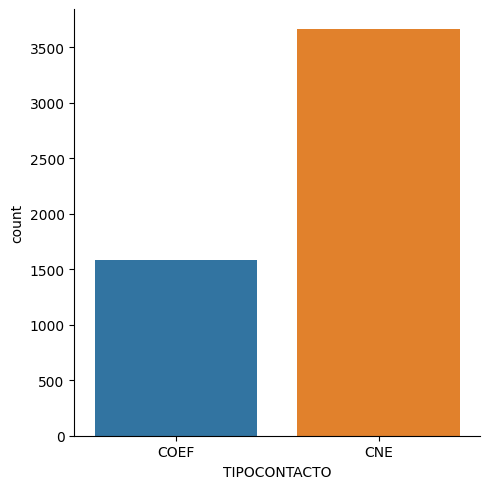

In [417]:
sns.catplot(x ='TIPOCONTACTO', kind='count', data=data)
plt.show()

Observamos el desbalance de las categorias de la variable TARGET

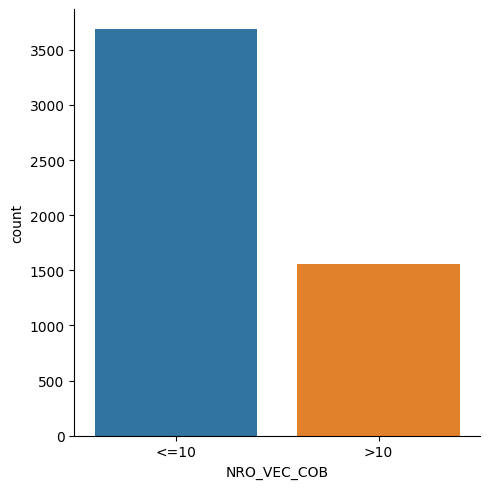

In [418]:
sns.catplot(x ='NRO_VEC_COB', kind='count', data=data)
plt.show()

Observamos que la mayoria de clientes tienen el numero de veces que cayo en cobranza < 10

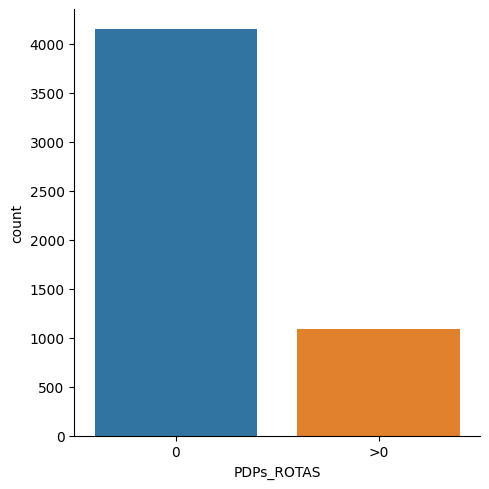

In [458]:
sns.catplot(x ='PDPs_ROTAS', kind='count', data=data)
plt.show()

La mayoria de clientes tiene 0 promesas que hizo sin cumplir

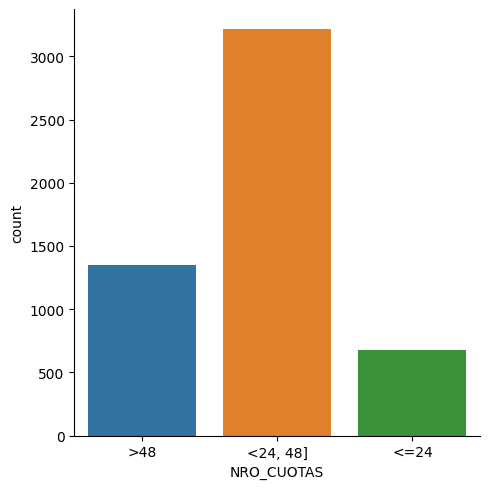

In [420]:
sns.catplot(x ='NRO_CUOTAS', kind='count', data=data)
plt.show()

La mayoria de clientes contiene el numero de cuotas dentro del intervalo <24,48]

Vertical orientation ignored with only `x` specified.


<Axes: xlabel='MES_0'>

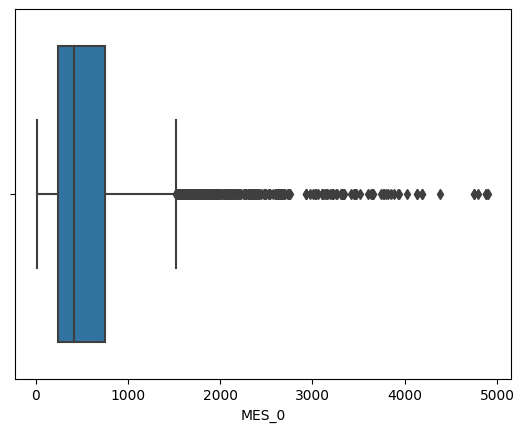

In [421]:
sns.boxplot(x="MES_0", data=data, orient="v")

In [ ]:
#SE PUEDE VIZUALIZAR ALTA CANTIDAD DE OUTLIERS EN LA VARIABLE MES_0

Vertical orientation ignored with only `x` specified.


<Axes: xlabel='MES_1'>

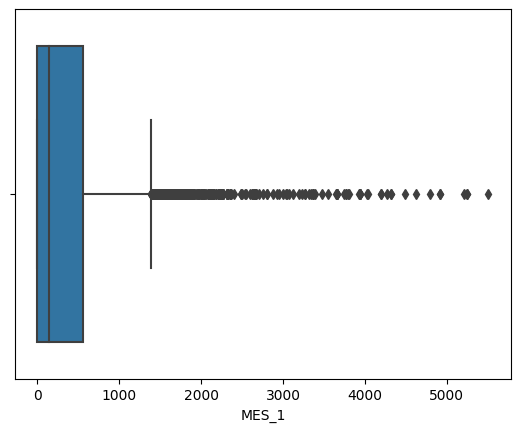

In [422]:
sns.boxplot(x="MES_1", data=data, orient="v")

In [ ]:
#SE PUEDE VIZUALIZAR ALTA CANTIDAD DE OUTLIERS EN LA VARIABLE MES_1

Vertical orientation ignored with only `x` specified.


<Axes: xlabel='MES_2'>

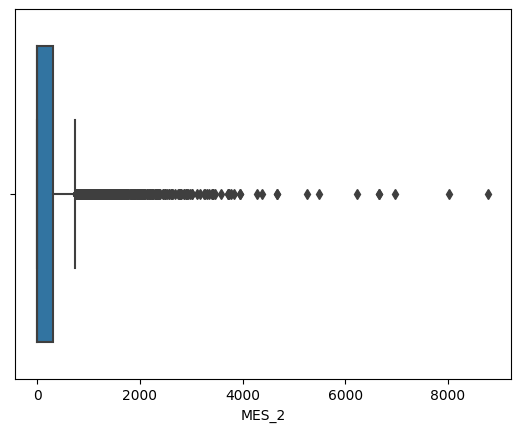

In [423]:
sns.boxplot(x="MES_2", data=data, orient="v")

In [ ]:
#SE PUEDE VIZUALIZAR ALTA CANTIDAD DE OUTLIERS EN LA VARIABLE MES_2

Vertical orientation ignored with only `x` specified.


<Axes: xlabel='DEUDA_TOTAL'>

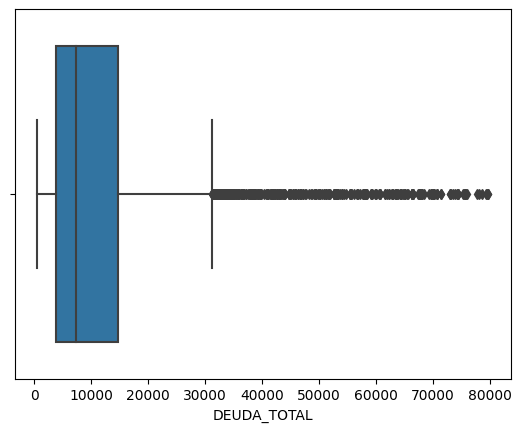

In [424]:
sns.boxplot(x="DEUDA_TOTAL", data=data, orient="v")

In [ ]:
#SE PUEDE VIZUALIZAR ALTA CANTIDAD DE OUTLIERS EN LA VARIABLE DEUDA_TOTAL

array([[<Axes: title={'center': 'MES_0'}>,
        <Axes: title={'center': 'MES_1'}>],
       [<Axes: title={'center': 'MES_2'}>,
        <Axes: title={'center': 'DEUDA_TOTAL'}>]], dtype=object)

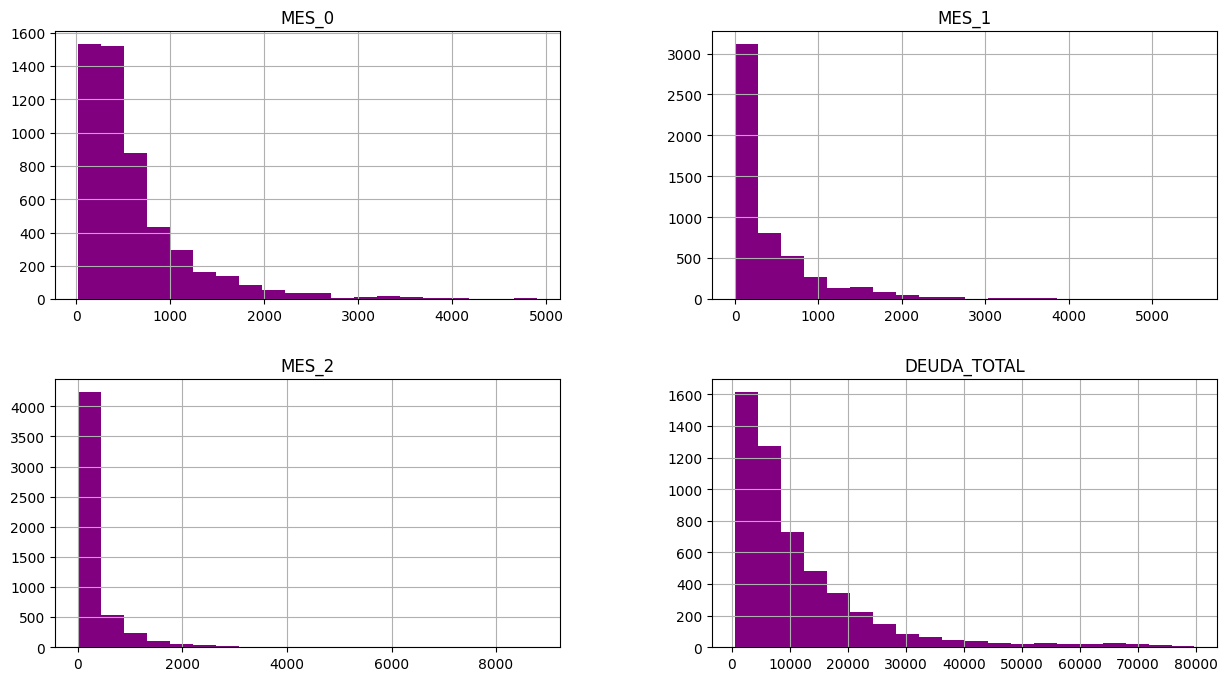

In [429]:
data.hist(bins = 20, figsize = (15,8), color = '#800080')

EN LAS GRAFICAS SE PUEDE OBSERVAR UNA MAYOR FRECUENCIA EN LA PARTE INICIAL 0 Y CON UNA ASIMETRIA CON COLA A LA DERECHA ADEMAS  EN LA VARIABLE DEUDA_TOTAL SE VIZUALISA UNA ASIMETRIA A LA DERECHA MAS LARGA POR LO TENTO PROBABLEMENTE TENGA MAYOR CANTIDAD DE OUTLIERS

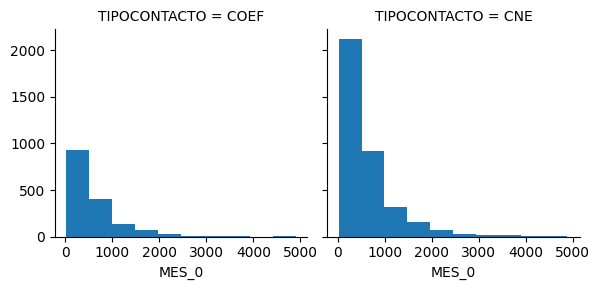

In [430]:
g = sns.FacetGrid(data, col='TIPOCONTACTO')
g.map(plt.hist, 'MES_0')

In [ ]:
# SE OBSERVA QUE LOS COEF TIENEN UNA MENOR FRECUENCIA A DIFERENCIA DE LOS TIPO CONTACTO CNE

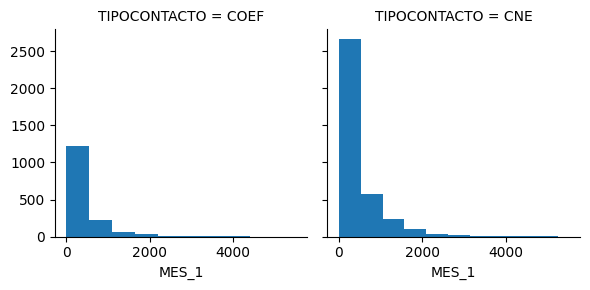

In [451]:
g = sns.FacetGrid(data, col='TIPOCONTACTO')
g.map(plt.hist, 'MES_1')

In [ ]:
# SE OBSERVA QUE LOS COEF TIENEN UNA MENOR FRECUENCIA A DIFERENCIA DE LOS TIPO CONTACTO CNE

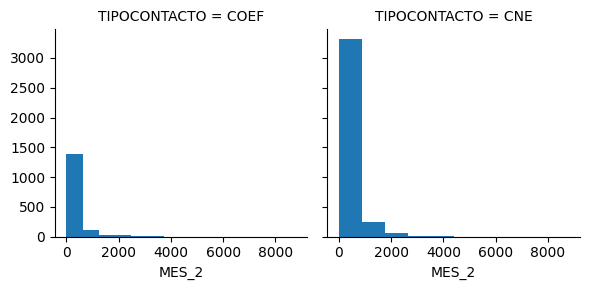

In [432]:
g = sns.FacetGrid(data, col='TIPOCONTACTO')
g.map(plt.hist, 'MES_2')

In [ ]:
# SE OBSERVA QUE LOS COEF TIENEN UNA MENOR FRECUENCIA A DIFERENCIA DE LOS TIPO CONTACTO CNE

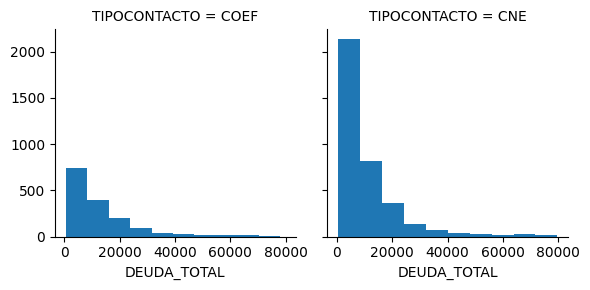

In [433]:
g = sns.FacetGrid(data, col='TIPOCONTACTO')
g.map(plt.hist, 'DEUDA_TOTAL')

In [ ]:
# SE OBSERVA QUE LOS COEF TIENEN UNA MENOR FRECUENCIA A DIFERENCIA DE LOS TIPO CONTACTO CNE

<Axes: xlabel='TIPOCONTACTO', ylabel='DEUDA_TOTAL'>

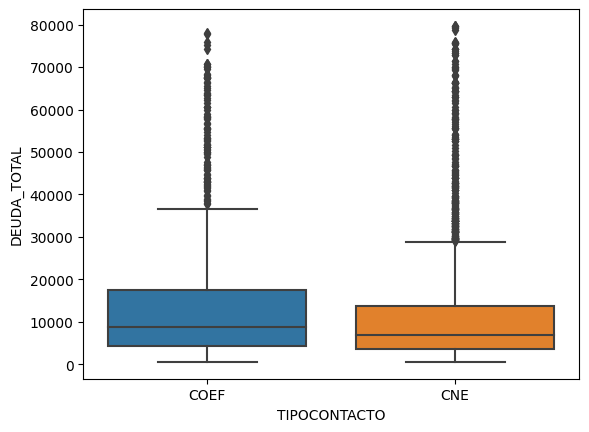

In [434]:
sns.boxplot(x='TIPOCONTACTO',y='DEUDA_TOTAL',data=data)

<Figure size 4200x4000 with 0 Axes>

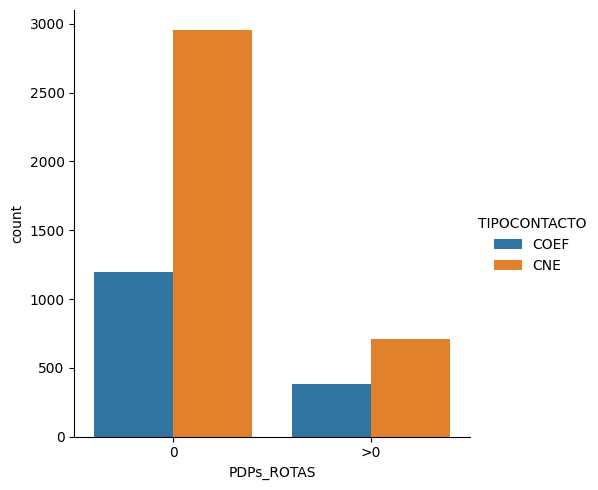

In [454]:
plt.figure(figsize=(42, 40))
sns.catplot(x='PDPs_ROTAS', hue='TIPOCONTACTO', kind='count', data=data)
plt.show()

<Figure size 4200x4000 with 0 Axes>

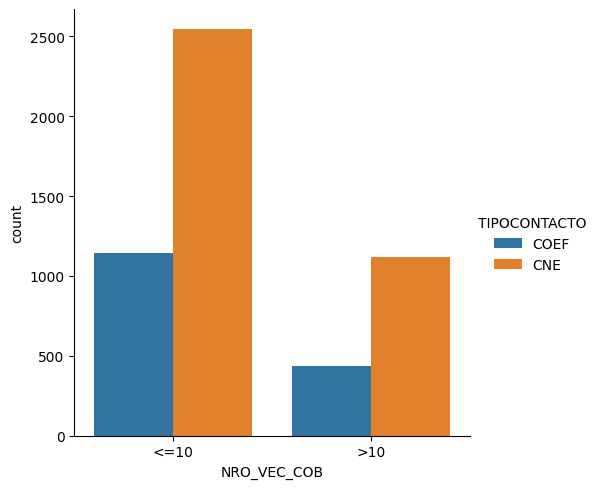

In [457]:
plt.figure(figsize=(42, 40))
sns.catplot(x='NRO_VEC_COB', hue='TIPOCONTACTO', kind='count', data=data)
plt.show()

<Figure size 4200x4000 with 0 Axes>

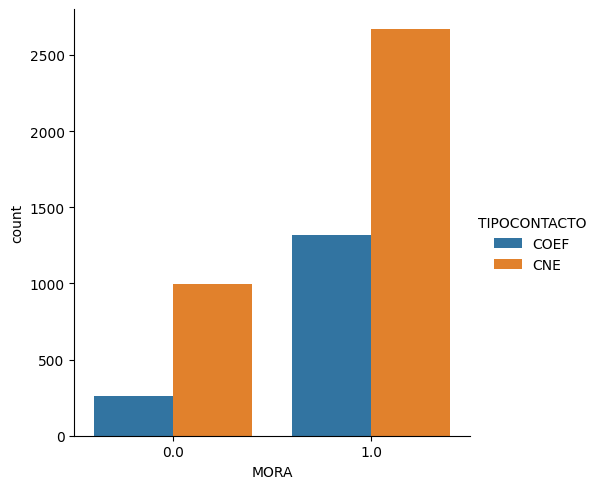

In [455]:
plt.figure(figsize=(42, 40))
sns.catplot(x='MORA', hue='TIPOCONTACTO', kind='count', data=data)
plt.show()

<Figure size 4200x4000 with 0 Axes>

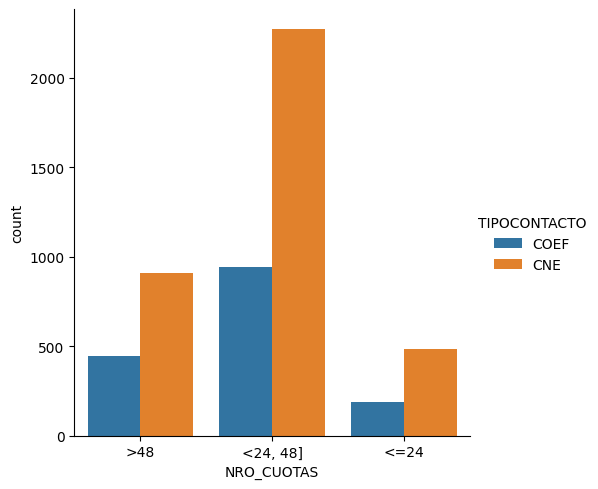

In [456]:
plt.figure(figsize=(42, 40))
sns.catplot(x='NRO_CUOTAS', hue='TIPOCONTACTO', kind='count', data=data)
plt.show()

<ipython-input-323-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

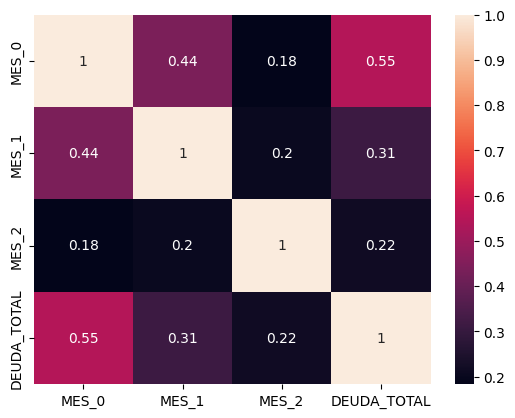

In [323]:
sns.heatmap(data.corr(),annot=True)

In [265]:
# MES_0,MES_1,MES_2 Y DEUDA_TOTAL son variables cuantitativas independientes
# SE OBSERVA QYE NINGUNA TIENE UNA CORRELACION ALTA (>0.6) POR LO TANTO
# CONSERVAREMOS TODAS LAS VARIABLES EN EL ESTUDIO

In [324]:
data.head()
#VIZUALIZAMOS NUESTRA DATA CON LA QUE TRABAJAREMOS

,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,DEUDA_TOTAL,MORA,TIPOCONTACTO
1,C00002,<=10,0,0,>48,610.58,612.69,611.54,13620.50,1.0,COEF
3,C00004,>10,0,0,"<24, 48]",323.07,46.85,74.26,2459.84,0.0,CNE
4,C00005,<=10,0,0,"<24, 48]",920.54,0.00,0.00,6591.76,0.0,CNE
5,C00006,<=10,0,0,"<24, 48]",364.27,371.11,0.00,9836.38,1.0,CNE
6,C00007,<=10,0,0,>48,692.77,287.31,718.96,26889.90,1.0,CNE


In [325]:
data.drop("TIPOCONTACTO",inplace = True, axis = 1) #eliminamos la variable target de la data original
data.drop("CLIENTE",inplace = True, axis = 1) #eliminamos la variable id de cliente
#ESTO PARA PODER TRABAJAR CON LAS VARIABLES QUE USAREMOS PARA LA PREDICCION

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 1 to 8457
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NRO_VEC_COB  5242 non-null   object 
 1   PDPs_ROTAS   5242 non-null   object 
 2   ESTADO_PDP   5242 non-null   object 
 3   NRO_CUOTAS   5242 non-null   object 
 4   MES_0        5242 non-null   float64
 5   MES_1        5242 non-null   float64
 6   MES_2        5242 non-null   float64
 7   DEUDA_TOTAL  5242 non-null   float64
 8   MORA         5242 non-null   object 
dtypes: float64(4), object(5)
memory usage: 409.5+ KB


In [327]:
data.head()

,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,DEUDA_TOTAL,MORA
1,<=10,0,0,>48,610.58,612.69,611.54,13620.50,1.0
3,>10,0,0,"<24, 48]",323.07,46.85,74.26,2459.84,0.0
4,<=10,0,0,"<24, 48]",920.54,0.00,0.00,6591.76,0.0
5,<=10,0,0,"<24, 48]",364.27,371.11,0.00,9836.38,1.0
6,<=10,0,0,>48,692.77,287.31,718.96,26889.90,1.0


*Realizamos* el proceso de one hot encoding con nuestras variables categóricas:

In [328]:
data = pd.get_dummies(data = data) #transformamos las variables categóricas a numéricas

<ipython-input-328-70bdaeb90982>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data = data) #transformamos las variables categóricas a numéricas
<ipython-input-328-70bdaeb90982>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data = data) #transformamos las variables categóricas a numéricas


In [329]:
data.head() # VIZUALIZAMOS ES SET DE DATOS LUEGO DE LA TRANSFORMACION CON UNA NUEVA VARIABLE ASIGNADA A CADA CATEGORIA

,MES_0,MES_1,MES_2,DEUDA_TOTAL,NRO_VEC_COB_<=10,NRO_VEC_COB_>10,PDPs_ROTAS_0,PDPs_ROTAS_>0,ESTADO_PDP_0,ESTADO_PDP_1,"NRO_CUOTAS_<24, 48]",NRO_CUOTAS_<=24,NRO_CUOTAS_>48,MORA_0.0,MORA_1.0
1,610.58,612.69,611.54,13620.50,1,0,1,0,1,0,0,0,1,0,1
3,323.07,46.85,74.26,2459.84,0,1,1,0,1,0,1,0,0,1,0
4,920.54,0.00,0.00,6591.76,1,0,1,0,1,0,1,0,0,1,0
5,364.27,371.11,0.00,9836.38,1,0,1,0,1,0,1,0,0,0,1
6,692.77,287.31,718.96,26889.90,1,0,1,0,1,0,0,0,1,0,1


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5242 entries, 1 to 8457
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MES_0                5242 non-null   float64
 1   MES_1                5242 non-null   float64
 2   MES_2                5242 non-null   float64
 3   DEUDA_TOTAL          5242 non-null   float64
 4   NRO_VEC_COB_<=10     5242 non-null   uint8  
 5   NRO_VEC_COB_>10      5242 non-null   uint8  
 6   PDPs_ROTAS_0         5242 non-null   uint8  
 7   PDPs_ROTAS_>0        5242 non-null   uint8  
 8   ESTADO_PDP_0         5242 non-null   uint8  
 9   ESTADO_PDP_1         5242 non-null   uint8  
 10  NRO_CUOTAS_<24, 48]  5242 non-null   uint8  
 11  NRO_CUOTAS_<=24      5242 non-null   uint8  
 12  NRO_CUOTAS_>48       5242 non-null   uint8  
 13  MORA_0.0             5242 non-null   uint8  
 14  MORA_1.0             5242 non-null   uint8  
dtypes: float64(4), uint8(11)
memory usage:

In [331]:
data_original = pd.concat([data, label,CLIENTE], axis=1) #CONCATENAMOS LAS VARIABLES TRANSFORMADAS CON LA VARIABLE TARGET Y CLIENTE(IDENTIFICADOR DE CLIENTE)

In [332]:
data_original.head()

,MES_0,MES_1,MES_2,DEUDA_TOTAL,NRO_VEC_COB_<=10,NRO_VEC_COB_>10,PDPs_ROTAS_0,PDPs_ROTAS_>0,ESTADO_PDP_0,ESTADO_PDP_1,"NRO_CUOTAS_<24, 48]",NRO_CUOTAS_<=24,NRO_CUOTAS_>48,MORA_0.0,MORA_1.0,TIPOCONTACTO,CLIENTE
1,610.58,612.69,611.54,13620.50,1,0,1,0,1,0,0,0,1,0,1,1,C00002
3,323.07,46.85,74.26,2459.84,0,1,1,0,1,0,1,0,0,1,0,0,C00004
4,920.54,0.00,0.00,6591.76,1,0,1,0,1,0,1,0,0,1,0,0,C00005
5,364.27,371.11,0.00,9836.38,1,0,1,0,1,0,1,0,0,0,1,0,C00006
6,692.77,287.31,718.96,26889.90,1,0,1,0,1,0,0,0,1,0,1,0,C00007


In [334]:
data_original["TIPOCONTACTO"].value_counts(normalize=True)*100

0    69.858833
1    30.141167
Name: TIPOCONTACTO, dtype: float64

**Evaluación de Algoritmos**

In [335]:
# REALIZAMOS LA PARTICION DE LA DATA EN TRAIN Y TEST
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3)

In [336]:
data.shape

(5242, 15)

In [351]:
X_train.shape

(3669, 15)

In [352]:
X_test.shape

(1573, 15)

In [354]:
y_train.value_counts(normalize=True)*100

0    69.828291
1    30.171709
Name: TIPOCONTACTO, dtype: float64

In [355]:
y_test.value_counts(normalize=True)*100

0    69.93007
1    30.06993
Name: TIPOCONTACTO, dtype: float64

Importamos las librerías de 5 tipos de algoritmos de clasificación:

1. Árboles de decisión
2. Regresión logística
3. XgBoost
4. Random forest

In [339]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

```

Creamos una función que nos permita resumir las principales métricas de los modelos y así poder comparar el performance de los algoritmos:

In [ ]:
# def nombre_funcion(param_1,param_2,...):
#     acciones que quieres que genere tu funcion sobre los parametros
#     accion1(param_1)

In [356]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Entrenamiento del modelo
    predictions = clf.predict(xTest) #Validación sobre la data de testing
    conf_mtx = confusion_matrix(yTest,predictions) #Matriz de confusión de la data de testing real con la predicha

    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) #Definición del área de visualización (2 gráficas)

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])#definición del formato de la matriz de confusión
    axes[0].set_xlabel('Predicted labels') #Titulo del eje x de la matriz de confusión
    axes[0].set_ylabel('True labels') #Titulo del eje y de la matriz de confusión
    axes[0].set_title('Confusion Matrix Test'); #Titulo de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['Contacto NO Efectivo', 'Contacto Efectivo']); #distribución de los resultados en la matriz de confusión del eje x
    axes[0].yaxis.set_ticklabels(['Contacto NO Efectivo', 'Contacto Efectivo']); #distribución de los resultados en la matriz de confusión del eje y

    print(classification_report(yTest,predictions)) #mostrar resultados

    roc_auc = roc_auc_score(yTest,predictions) #definición del cálculo del auc
    print ("AUC ROC : ",roc_auc) #mostrar el resultado

    fpr, tpr,_ = roc_curve(yTest, predictions) #Función para armar la curva ROC
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc)); #código para mostrar el resultado del auc en la gráfica
    axes[1].plot([0, 1], [0, 1]) #código del formato de la gráfica
    plt.xlabel('False Positive Rate') #título del eje x
    plt.ylabel('True Positive Rate') #título del eje y
    plt.title('ROC') #título del gráfico

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1100
           1       0.35      0.33      0.34       473

    accuracy                           0.62      1573
   macro avg       0.54      0.53      0.53      1573
weighted avg       0.61      0.62      0.61      1573

AUC ROC :  0.5344503171247357


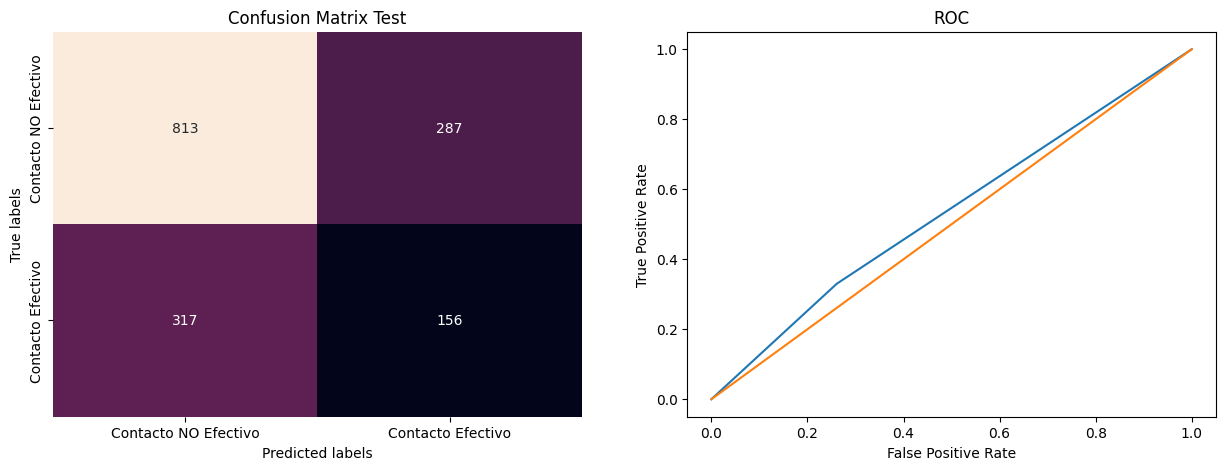

In [359]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      1100
           1       0.36      0.04      0.07       473

    accuracy                           0.69      1573
   macro avg       0.53      0.50      0.44      1573
weighted avg       0.60      0.69      0.59      1573

AUC ROC :  0.5044820295983087


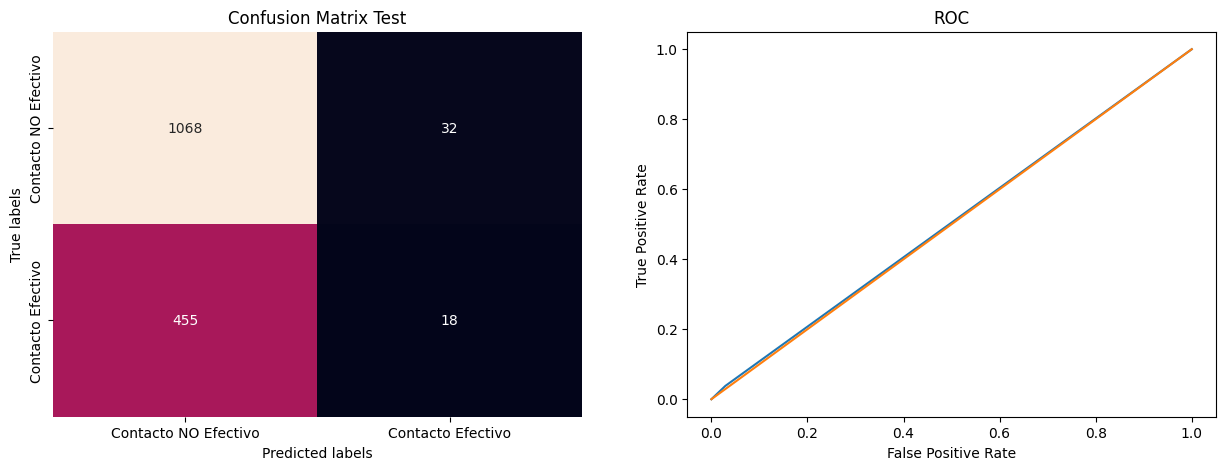

In [360]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.73      0.85      0.78      1100
           1       0.43      0.26      0.33       473

    accuracy                           0.67      1573
   macro avg       0.58      0.56      0.55      1573
weighted avg       0.64      0.67      0.65      1573

AUC ROC :  0.5560782241014799


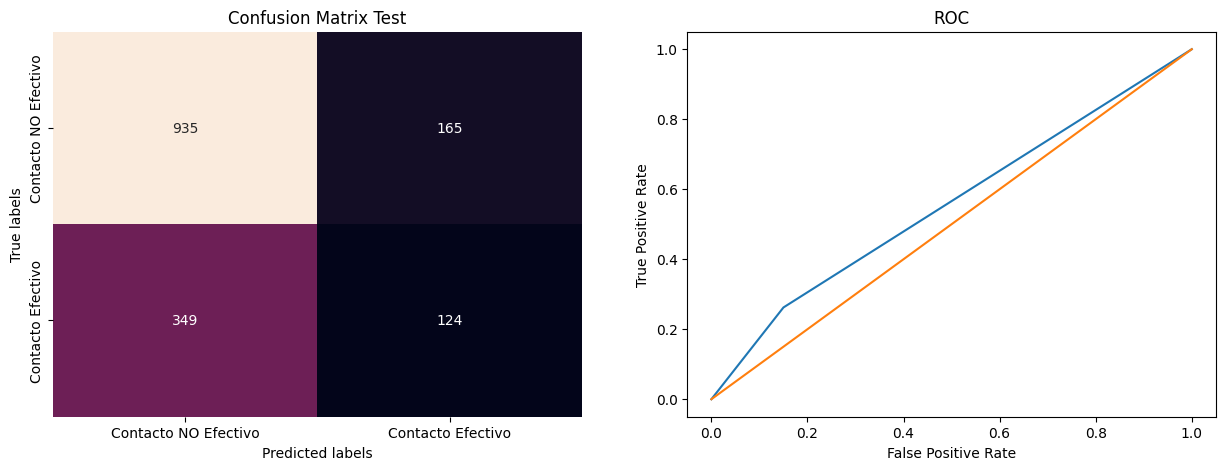

In [363]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest, X_train, X_test, y_train, y_test)

Randon Forest obtuvo mejores resultados para la clasificacion sin embargo los tres algoritmos de clasificación obtuvieron una muy baja precision por lo tanto
realizaremos un balanceo de nuestra variable target y ademas optimizaremos los hiperparametros

**Calibración de parámetros**

In [367]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}


RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30],
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

In [368]:
from sklearn.model_selection import GridSearchCV # Gridsearch se basa en la tecnica de Busqueda por cuadricula

def grid_search(clf,parameters,xTrain,Ytrain):

    grid_obj = GridSearchCV(clf,parameters,scoring = 'roc_auc',cv = 5) #scoring sirve para indicarle que metrica va a usar para comparar sus iteraciones de modelos
    grid_fit = grid_obj.fit(xTrain,Ytrain) # Entreno
    best_clf = grid_fit.best_estimator_ # Entrega el mejor resultado obtenido en las iteraciones

    return best_clf

Volvemos a entrenar nuestra data con los mismos algoritmos, ahora con el

calibramiento de los parámetros:

              precision    recall  f1-score   support

           0       0.71      0.94      0.81      1100
           1       0.44      0.12      0.19       473

    accuracy                           0.69      1573
   macro avg       0.58      0.53      0.50      1573
weighted avg       0.63      0.69      0.62      1573

AUC ROC :  0.5273784355179704


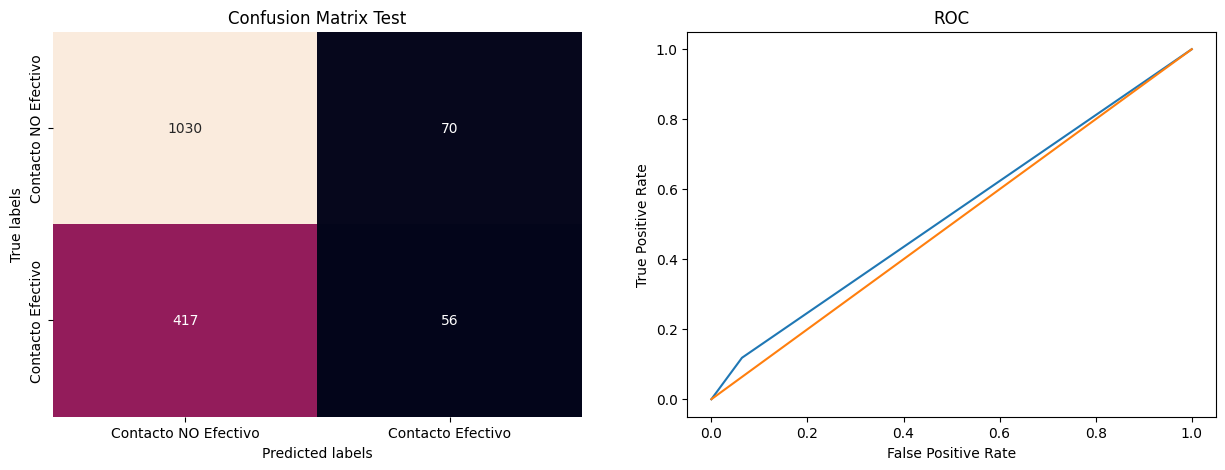

In [369]:
#tree_grid = grid_search(decision_tree,Tree_parameters,X_train,y_train)
#apply_classifier(tree_grid,X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

              precision    recall  f1-score   support

           0       0.78      0.55      0.65      1100
           1       0.38      0.64      0.48       473

    accuracy                           0.58      1573
   macro avg       0.58      0.60      0.56      1573
weighted avg       0.66      0.58      0.60      1573

AUC ROC :  0.5962050739957716


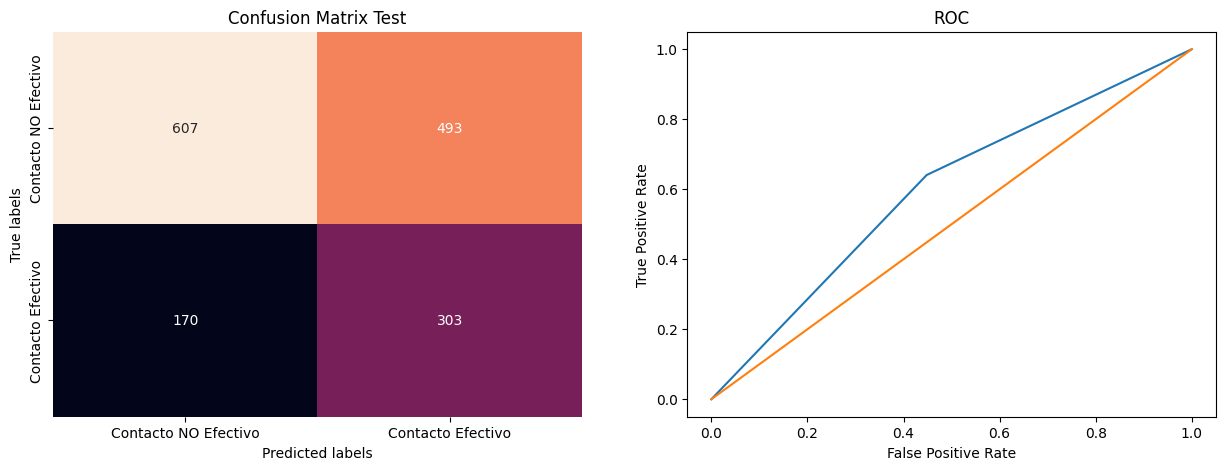

In [370]:
#randomForest_grid = grid_search(random_forest,RandomForest_parameters,X_train,y_train);
#apply_classifier(randomForest_grid,X_train, X_test, y_train, y_test)

**Balanceo de las clases de variable a predecir TIPO CONTACTO**

In [371]:
from sklearn.utils import resample

upsample_data = data_original # Generar una copia de nuestra data original

majority = upsample_data[upsample_data["TIPOCONTACTO"]==0] # Muestra categoria No churn
minority = upsample_data[upsample_data["TIPOCONTACTO"]==1] # Muestra categoria Churn 27%

In [372]:
majority.shape, minority.shape

((3662, 17), (1580, 17))

In [378]:
minority_upsampled = resample(minority, replace=True, n_samples=3662,random_state=1) # Sobremuestreo

In [379]:
minority_upsampled.shape

(3662, 17)

In [380]:
del(upsample_data) # elimina
upsample_data = pd.concat([majority,minority_upsampled])

In [381]:
upsample_data.shape

(7324, 17)

In [382]:
upsample_data["TIPOCONTACTO"].value_counts()

0    3662
1    3662
Name: TIPOCONTACTO, dtype: int64

In [383]:
upsample_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 3 to 7974
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MES_0                7324 non-null   float64
 1   MES_1                7324 non-null   float64
 2   MES_2                7324 non-null   float64
 3   DEUDA_TOTAL          7324 non-null   float64
 4   NRO_VEC_COB_<=10     7324 non-null   uint8  
 5   NRO_VEC_COB_>10      7324 non-null   uint8  
 6   PDPs_ROTAS_0         7324 non-null   uint8  
 7   PDPs_ROTAS_>0        7324 non-null   uint8  
 8   ESTADO_PDP_0         7324 non-null   uint8  
 9   ESTADO_PDP_1         7324 non-null   uint8  
 10  NRO_CUOTAS_<24, 48]  7324 non-null   uint8  
 11  NRO_CUOTAS_<=24      7324 non-null   uint8  
 12  NRO_CUOTAS_>48       7324 non-null   uint8  
 13  MORA_0.0             7324 non-null   uint8  
 14  MORA_1.0             7324 non-null   uint8  
 15  TIPOCONTACTO         7324 non-null   i

In [384]:
CLIENTE_upsample = upsample_data["CLIENTE"]
label_upsample = upsample_data["TIPOCONTACTO"]
upsample_data.drop("TIPOCONTACTO",inplace = True, axis = 1)
upsample_data.drop("CLIENTE",inplace = True, axis = 1)

Vuelvo a hacer una partición de mi nueva data en data de entrenamiento y de prueba (30%)

In [385]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

Ahora ejecuto nuevamente todos mis algoritmos con la data balanceada:

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1116
           1       0.74      0.88      0.81      1082

    accuracy                           0.79      2198
   macro avg       0.80      0.79      0.79      2198
weighted avg       0.80      0.79      0.79      2198

AUC ROC :  0.7925950218300108


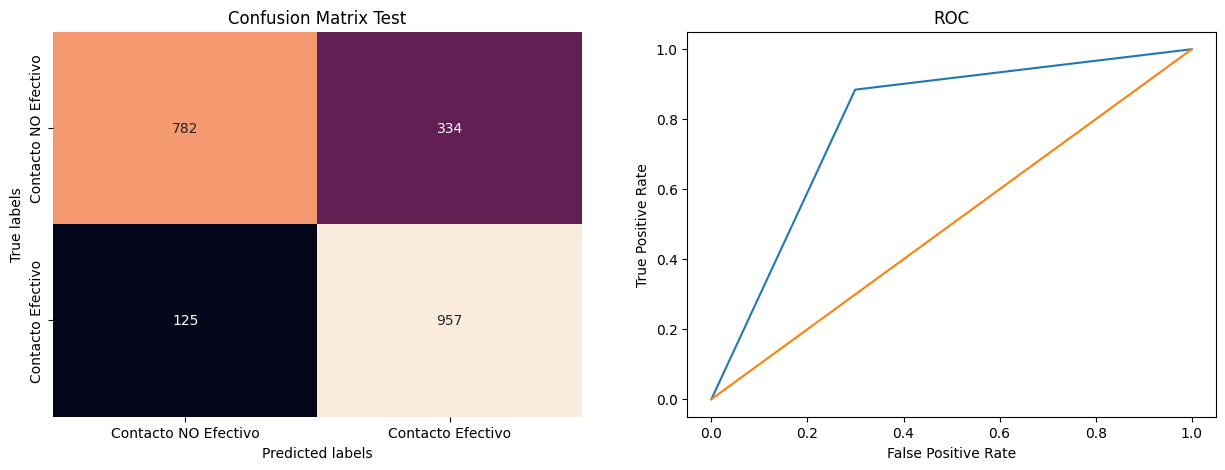

In [387]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       0.56      0.75      0.64      1116
           1       0.60      0.38      0.46      1082

    accuracy                           0.57      2198
   macro avg       0.58      0.57      0.55      2198
weighted avg       0.58      0.57      0.55      2198

AUC ROC :  0.5658080416592134


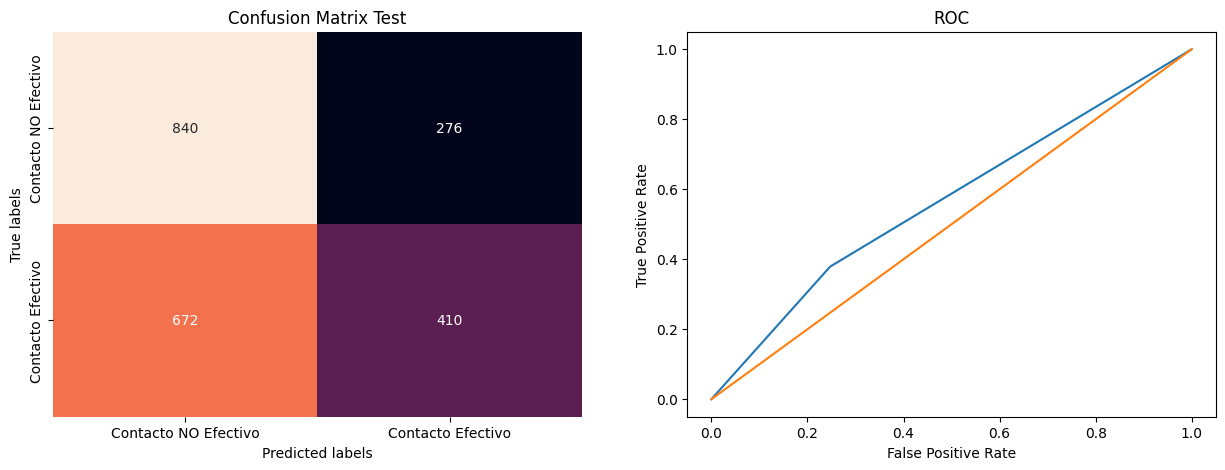

In [388]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      1116
           1       0.77      0.89      0.82      1082

    accuracy                           0.81      2198
   macro avg       0.82      0.82      0.81      2198
weighted avg       0.82      0.81      0.81      2198

AUC ROC :  0.815920669939512


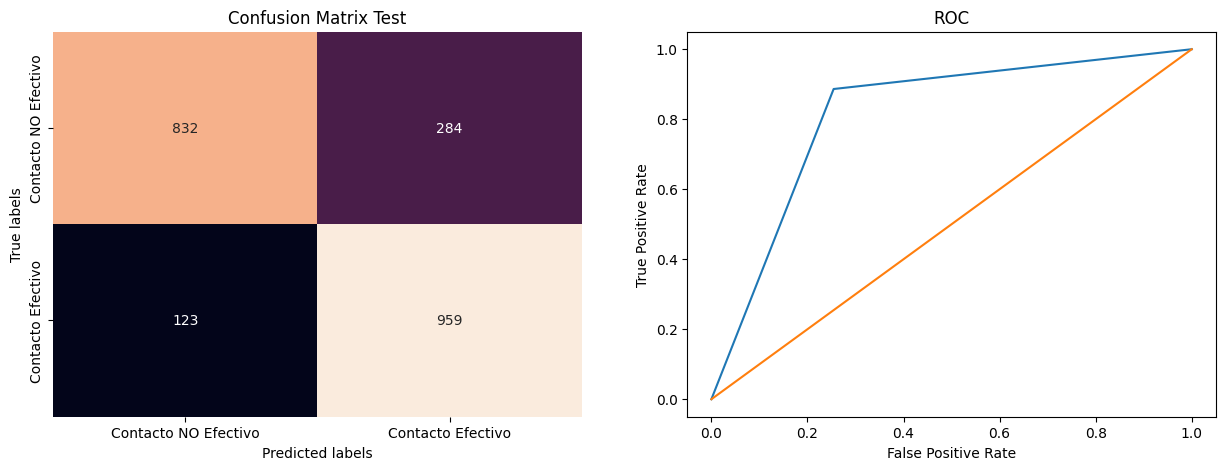

In [389]:
random_forest = RandomForestClassifier()
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

:Vemos que todos los algoritmos utilizados aumentaron considerablemente sus niveles de precisión con el balanceo de datos. Sin embargo el algoritmo de regresion logistica sigue siendo malo por lo tanto nos quedamos con el Algoritmo Random Forest al verificarce que tiene mejor precision en la clasificacion de los Contactos Efectivos

In [390]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 9.9 MB/s eta 0:00:00


In [391]:
import shap

In [392]:
explainer = shap.Explainer(random_forest)
shap_values = explainer.shap_values(X_test_upS)

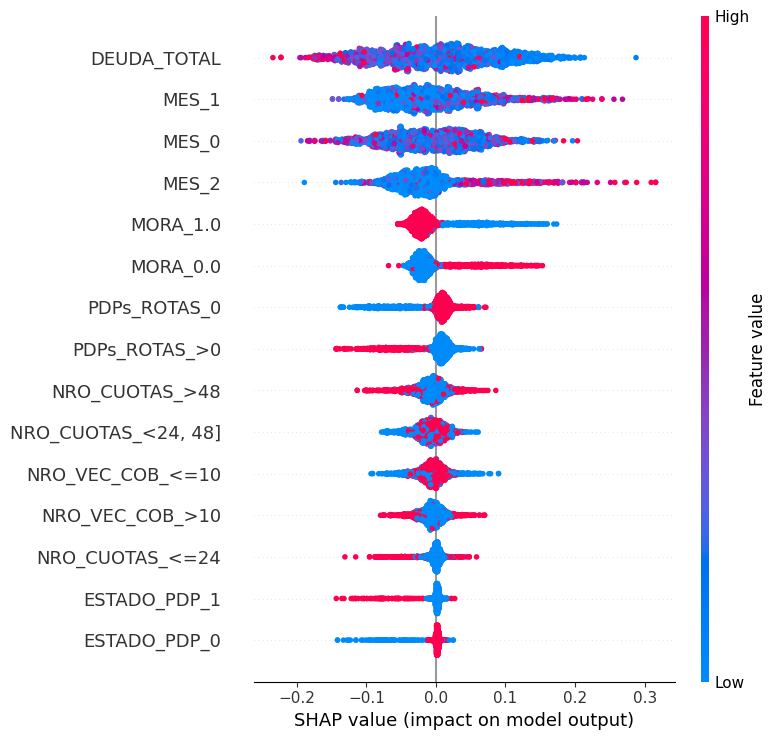

In [393]:
shap.summary_plot(shap_values[0], X_test_upS)

Vizualizamos que nuestras variables mas importantes son las numericas seguido de la Variable Mora y Numero de promesas que el cliente hizo sin cumplir; estas variables podrian considerarce para realizar un nnuevo modelo y verificar si la precision de los algoritmos mejora